# AML Coursework

# The Data - Surfing

Surfing is important for many people's lives for several reasons. Here are a few key aspects that highlight the significance of surfing:

Physical Health: Surfing is an excellent form of exercise that engages the entire body. Paddling out to the waves builds upper body strength and cardiovascular endurance. Balancing on the board enhances core stability and leg strength. Regular surfing can contribute to improved overall fitness, flexibility, and coordination.

Mental Well-being: Surfing is known to have a positive impact on mental health. The combination of being in nature, the rhythmic movement of the waves, and the feeling of riding a wave can be meditative and stress-relieving. Surfing provides an opportunity to escape the pressures of daily life, allowing individuals to recharge and find peace of mind.

Connection with Nature: Surfing allows people to connect with the ocean and the natural environment. Being in the water, surrounded by the vastness of the ocean, can create a sense of awe and humility. It provides an opportunity to observe marine life, experience the changing tides, and appreciate the beauty of the coastal landscapes. This connection with nature can foster a greater sense of environmental stewardship.

Community and Social Bonding: Surfing is often enjoyed as a social activity, whether it's with friends, family, or fellow surfers. Surfing communities are prevalent in many coastal regions, creating a sense of belonging and camaraderie. The shared experiences, stories, and support among surfers contribute to a strong community spirit.

The Dataset we're working can be found at the following address:
https://www.kaggle.com/datasets/loureiro85/surfing

Content
Data was acquired through online forms answered by surfers.
Rows correspond to surfers and columns to questions.
The dataset corresponds to the surfing system, composed of five groups of data:

Surfboard, Wave, Surfer, Manoeuvres, Performance


# Contructing and Selecting Features

In [40]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

#importing datasets  
data_set= pd.read_csv('data/df_surf.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

# Building ML algorithms

In [41]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

data_set.fillna(data_set.mean())

,board_how_many,surfer_height,surfer_weight,board_length,appropriate_board,surfer_age,board_volume,board_width,wave_height,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
0,5,1.72,85.0,5.6,0,32,26.7,18.3,3,3,3,3.0,0
1,1,1.58,88.0,5.7,0,31,26.7,18.3,2,2,2,2.0,0
2,3,1.73,75.0,6.2,1,29,30.5,20.4,2,2,5,3.5,3
3,1,1.76,76.0,6.2,1,34,30.6,19.4,2,3,6,4.5,3
4,5,1.77,84.0,6.2,1,53,30.6,19.4,5,5,5,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3,1.83,83.0,6.1,1,33,33.0,19.5,3,3,3,3.0,0
155,3,1.75,90.0,5.2,0,37,24.6,18.8,4,4,4,4.0,0
156,1,1.78,91.0,5.2,0,29,24.6,18.8,2,2,3,2.5,1
157,6,1.73,92.0,5.2,0,24,24.6,18.8,3,3,4,3.5,1


In [42]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

print(y_pred.mean())

0.5


# Evaluating models and analysing the results

In [43]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

print(cm.mean())

10.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


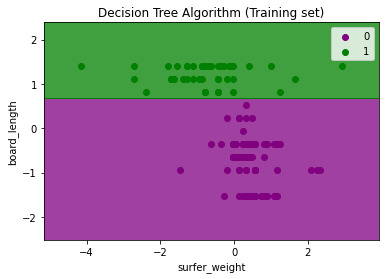

In [44]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm (Training set)')  
mtp.xlabel('surfer_weight')  
mtp.ylabel('board_length')  
mtp.legend()  
mtp.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


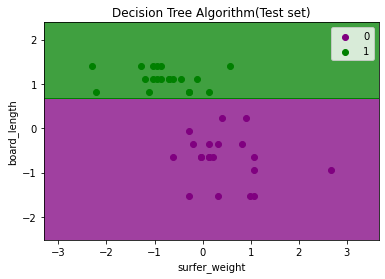

In [45]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm(Test set)')  
mtp.xlabel('surfer_weight')  
mtp.ylabel('board_length')  
mtp.legend()  
mtp.show()  